# Integrating Ordinary Differential Equations using numpy and scipy

In this notebook we will use python to solve the equations governing the motion of a pendulum. In doing so we will see how to:
* import libraries and read their documentation to use in-built functions
* define functions with positional and keyword arguments and define defaults for those arguments
* use loops to perform repeated calculations
* create and manipulate numpy arrays
* use scipy's inbuilt solve_ivp function to solve ordinary differential equations given an initial condition (i.e. an initial value problem, or IVP)
* use simple plotting routines from matplotlib

The second order differential equation governing the motion of a pendulum can be derived from Newton's second law of motion and is written as:

\begin{equation}
\ddot{\theta} = -\frac{g}{l}\sin\theta,
\end{equation}
where $\theta$ is the angle between the arm of the pendulum and the vertical, $g$ is the acceleration due to gravity and $l$ is the length of the arm of the pendulum. We use the notation $\dot{\theta}$ to represent the time derivative, so $\dot{\theta}=\frac{d\theta}{dt}$ and $\ddot{\theta}=\frac{d^2\theta}{dt^2}$.

To solve this second order differential equation we first rewrite it as a system of two first order differential equations by introducing the variable $\phi$:

\begin{align}
\dot{\theta} &= \phi, \\
\dot{\phi} &= -\frac{g}{l}\sin\theta.
\end{align}

Now we can write the equations in the form

\begin{equation}
\dot{X} = f(X),
\end{equation}
where

\begin{equation}
X = \begin{pmatrix}
\theta \\
\dot{\theta}
\end{pmatrix}
\end{equation}
and

\begin{equation}
f(X) = \begin{pmatrix}
\dot{\theta} \\
-\frac{g}{l}\sin\theta.
\end{pmatrix}
\end{equation}

When the angle $\theta$ is small, we can solve these equations analytically, with the solution given by:

\begin{equation}
\theta(t) = \theta_0\cos(\omega t)
\end{equation}
where $\omega=\sqrt{g/l}$ and $\theta_0=\theta(0)$ is the initial angle of the pendulum.

The outline of this notebook is as follows:
1. Evaluate and plot the analytical solution.
2. Solve the equations numerically using the forward Euler algorithm.
3. Use more sophisticated algorithms provided by scipy to solve the equations.

## Evaluating and plotting the analytical solution
First we will import the libraries or functions that we need. As we will be using many different functions from the numpy library, we will import the entire library and follow common usage by giving it the shortened name np:

In [3]:
import numpy as np

We only require one sublibrary of matplotlib and again we follow common usage by giving it a shortened name:

In [19]:
import matplotlib.pyplot as plt

We would now like to compute and plot the analytical solution for the evolution of the angle $\theta$ for a pendulum of length $1$, swinging on Earth so $g=9.81$. We start with an initial angle of $\theta_0=0.1$. First we define variables to hold these chosen values:

In [20]:
g = 9.81
l = 1
theta_0 = 0.1

Now we choose a time period, say $t=0$ to $t=1$, and a time interval at which to evaluate the solution, say $dt=0.1$. We can use the linspace function in numpy to define these time values. Note that the required arguments to linspace are the \textit{start} value, the \textit{end} value and the \textit{number of values}, which in this case is 11 since we are including the endpoints. For this small number of values, we can easily print the output to confirm that it is correct:

In [24]:
times = np.linspace(0, 1, 11)
print(times)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


We can now evaluate and print the solution at these times.

In [27]:
sol = theta_0 * np.cos(np.sqrt(g/l)*times)
print(sol)

[ 0.1         0.09513497  0.08101324  0.05900887  0.0312629   0.00047503
 -0.03035906 -0.05823919 -0.08045262 -0.09483795 -0.09999549]


However, plotting the values would give a better indication of the behaviour of the pendulum.

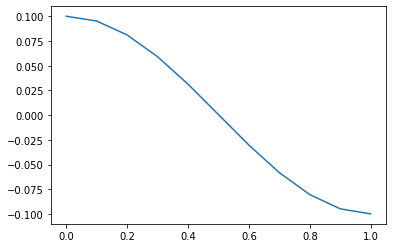

In [29]:
plt.plot(times, sol)

This looks reasonable - the angle decreases after the pendulum is released until it reaches the vertical and it continues to swing until it reaches $-\theta_0$.

### Exercises
1. The plot looks a little lumpy so let's compute the solution at more points within the time interval $t=0, 1$. Change the definition of times, keeping the start and end times the same, so that it contains more points. Recompute the solution and replot to see that it is smoother.
2. Change the definition of times so that it covers the time interval $t=0, 10$. Recompute the solution and replot.

## Numerical solution using forward Euler
The forward Euler algorithm splits the time interval $t=[0, T]$ into $n$ subintervals of length $\Delta t=T/n$. Then at time $t_i=i \Delta t$ the solution to the equation $\dot{X}=f(X)$ is approximated as:

\begin{equation}
X(t_i) = X_i \approx X_{i-1} + \Delta t f(X_{i-1}).
\end{equation}

So starting from our initial value $X_0$ we can compute $X(t_1)$:
\begin{equation}
X_1 = X_0 + \Delta t f(X_0).
\end{equation}

We can then use this value, $X_1$, to compute $X_2$:
\begin{equation}
X_2 = X_1 + \Delta t f(X_1),
\end{equation}
and so on until we reach the end of our time interval.

From this description we notice that:
1. We need to repeatedly evaluate the function $f$ with different input values of $X_i$.
2. We repeat the same calculation to update $X_{i+1}$ based on $X_i$.

To do each of these steps we can define python functions.

First we define a function $f$ that will return $(\dot{\theta}, -(g/l)\sin(\theta))$ given $X=(\theta, \dot{\theta})$. Notice that this function requires the values $g$ and $l$. We could set these in our function, but to make our code more flexible we will specify them as input parameters with the default values used above.

In [39]:
def f(X, g=9.81, l=1):
    theta, theta_dot = X[0], X[1]
    return np.array((theta_dot, -(g/l)*np.sin(theta)))

Now we define a function that will do one step of the forward Euler algorithm, that is, it will return $X_{i+1}$ given $X_i$ and $\Delta t$.

In [40]:
def forward_euler(Xi, dt):
    Xip1 = Xi + dt * f(Xi)
    return Xip1

Now we need to write a loop to repeat the calculation for $n$ timesteps to reach $T=n\Delta t$. First we set the initial value $X_0$ and the timestep $\Delta t$. We also initialise the counter $i$ and set the number of timesteps $n$. We also

In [47]:
X0 = np.array((0.1, 0))
dt = 0.01
i = 0
n = 100

Xi = X0
X = X0.copy()
while i < n:
    i += 1
    Xip1 = forward_euler(Xi, dt)
    X = np.vstack((X, Xip1))
    Xi = Xip1

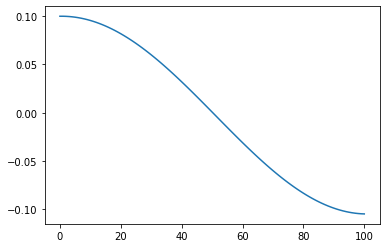

In [50]:
plt.plot(X[:,0])

### Exercises
1. We have specified the number of timesteps $n$ rather than the final time $T$. Rewrite the loop to calculate $t_i$ and terminate when the final time $T$ is reached. You can also save the values of $t$ and use them for the $x$-axis of the plot.
2. Plot both the analytical and numerical solutions on the same plot. Can you use the numpy norm function to compare how close they are? This is the approximation error of the forward Euler algorithm. Repeat this calculation for 5 different values of $\Delta t$ and plot the error against the timestep - you should get a linear plot as the forward Euler algorithm is first order, meaning that the approximation error is proportional to the timestep.
3. Experiment with passing in different values of g and l to f.

## Numerical solution using scipy
As we have seen, the forward Euler algorithm has an approximation error that is proportional to the timestep used. Many other timestepping algorithms have been constructed that have better approximation orders, meaning that the error decreases more rapidly with a decrease in timestep. The Scipy integrate library provides several of these algorithms, which are described in its documentation. We will begin by using the default scheme which is a fourth order method that uses an error estimator to adjust $\Delta t$ at each step.

We begin by importing the solve_ivp function:

In [51]:
from scipy.integrate import solve_ivp

To use the solve_ivp function we need to define a new $f$ because the $f$ that we pass to solve_ivp must take 2 arguments: $t$ and $X$. Since our $f$ is not time-dependent we have not passed in $t$ before, but we must do so now, even though we don't use it, to satisfy the interface required by solve_ivp. We can also specify the keyword arguments $g$ and $l$ as before - we will see later how to pass in values other than the defaults via the call to solve_ivp.

In [53]:
def f_ivp(t, X, g=9.81, l=1):
    theta, theta_dot = X[0], X[1]
    return np.array((theta_dot, -(g/l)*np.sin(theta)))

In [61]:
X0 = (0.1, 0)
X = solve_ivp(f_ivp, (0, 10), X0)

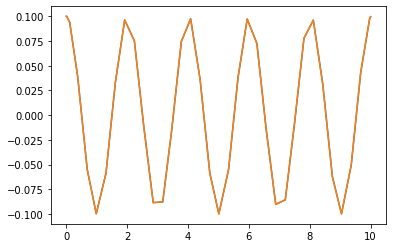

In [56]:
plt.plot(X.t, X.y[0,:])
plt.plot(X.t, X0[0]*np.cos(np.sqrt(g/l)*X.t))
plt.show()

In [66]:
def double_pendulum(t, X, g=9.81, l1=1, l2=1, m1=1, m2=1):
    theta1, theta2, theta1_dot, theta2_dot = X
    denom = l1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2))
    return np.array((theta1_dot,
                    theta2_dot,
                    (-g*(2*m1 + m2)*np.sin(theta1) - m2*g*np.sin(theta1-2*theta2) - 2*np.sin(theta1-theta2)*m2*(theta2_dot**2*l2 + theta1**2*l1*np.cos(theta1-theta2)))/denom,
                    2*np.sin(theta1-theta2)*(theta1_dot**2*l1*(m1+m2) + g*(m1+m2)*np.cos(theta1)+theta2_dot**2*l2*m2*np.cos(theta1-theta2))/denom
                    ))

In [67]:
X0 = (0.1, 0, 0.1, 0)
X = solve_ivp(double_pendulum, (0, 10), X0)

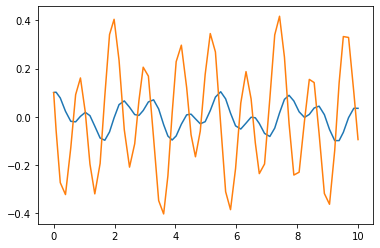

In [71]:
plt.plot(X.t, X.y[0,:])
plt.plot(X.t, X.y[2,:])

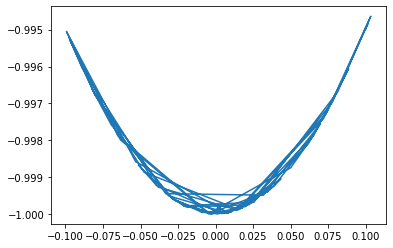

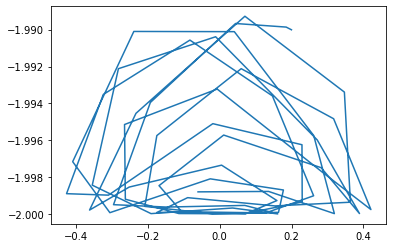

In [74]:
def convert_coords(X):
    return (np.sin(X[0,:]), -np.cos(X[0,:]), np.sin(X[0,:])+np.sin(X[2,:]), -np.cos(X[0,:])-np.cos(X[0,:]))

x1, y1, x2, y2 = convert_coords(X.y)
plt.plot(x1, y1)
plt.show()
plt.plot(x2, y2)